In [12]:
from datasets import Dataset, load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
ccr4not_token_dict = {"ENSG00000125107":5588, "ENSG00000111596": 3901, "ENSG00000088038": 1762, "ENSG00000080802": 1508, "ENSG00000113300": 4156,
                      "ENSG00000198791": 17238, "ENSG00000155508": 9825, "ENSG00000144580": 8543, "ENSG00000182973": 15001, "ENSG00000158435": 10162}
token_list = list(ccr4not_token_dict.values())
eif_list = [9994]#[10600, 9994]

In [9]:
cell_dataset = load_from_disk("/mnt/scratchc/ghlab/toby/Geneformer/Genecorpus-30M/example_input_files/cell_classification/cell_type_annotation/cell_type_train_data.dataset")

In [49]:
def if_has_tokens_to_perturb(example):
    return (len(set(example["input_ids"]).intersection(token_list))>=3)
filtered_input_data = cell_dataset.filter(if_has_tokens_to_perturb, num_proc=16)
print(len(filtered_input_data))
print(len(cell_dataset))
print(len(filtered_input_data)/len(cell_dataset))

Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

1063
249556
0.004259564987417654


In [8]:
heart_dataset = load_from_disk("/mnt/scratchc/ghlab/toby/Geneformer/Genecorpus-30M/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset")
exp_list = []
for n in range(11):
    def if_has_tokens_to_perturb(example):
        return (len(set(example["input_ids"]).intersection(token_list))==n)
    filtered_input_data = heart_dataset.filter(if_has_tokens_to_perturb, num_proc=16)
    exp_list.append(len(filtered_input_data))


Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

In [16]:
print(exp_list)
n = np.arange(0,11)
exp_df = pd.DataFrame({'n':n, 'comp_exp':exp_list})

[188806, 190940, 115971, 54906, 21090, 5968, 1315, 152, 9, 2, 0]


/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


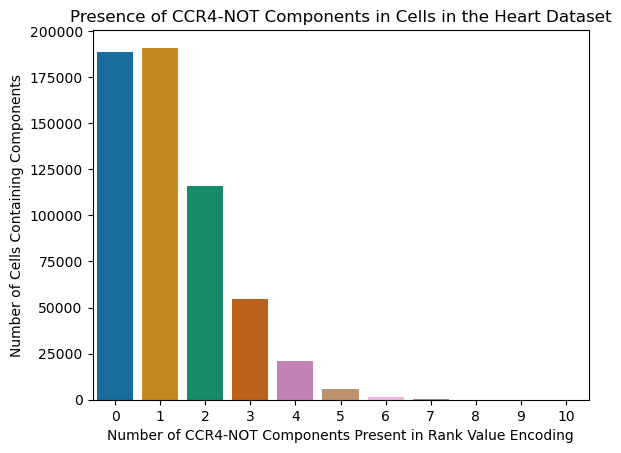

In [18]:
ax = sns.barplot(data=exp_df, x='n',y='comp_exp', palette='colorblind')
ax.set_xlabel('Number of CCR4-NOT Components Present in Rank Value Encoding')
ax.set_ylabel('Number of Cells Containing Components')
ax.set_title('Presence of CCR4-NOT Components in Cells in the Heart Dataset')
plt.show()

In [58]:
def if_has_eifs(example):
    return (len(set(example["input_ids"]).intersection(eif_list))>=1)
filtered_input_data = cell_dataset.filter(if_has_eifs, num_proc=16)
print(len(filtered_input_data))
print(len(cell_dataset))
print(len(filtered_input_data)/len(cell_dataset))

Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

80178
249556
0.3212825978938595


In [59]:
filtered_input_data = heart_dataset.filter(if_has_eifs, num_proc=16)
print(len(filtered_input_data))
print(len(filtered_input_data)/len(heart_dataset))

Filter (num_proc=16):   0%|          | 0/579159 [00:00<?, ? examples/s]

77767
0.13427573429748998


In [71]:
def is_organ(example):
    return(example['organ_major'] == organ)
for organ in organs:
    organ_data=cell_dataset.filter(is_organ, num_proc=16)
    eIF_data=organ_data.filter(if_has_eifs, num_proc=16)
    print(f'{organ}: {len(eIF_data)/len(organ_data) * 100}')

Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/8660 [00:00<?, ? examples/s]

bone_marrow: 16.374133949191684


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/13440 [00:00<?, ? examples/s]

brain: 41.58482142857143


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/17110 [00:00<?, ? examples/s]

immune: 18.27001753360608


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/45059 [00:00<?, ? examples/s]

kidney: 46.914046028540355


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/50363 [00:00<?, ? examples/s]

large_intestine: 30.61572980164009


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/28376 [00:00<?, ? examples/s]

liver: 25.1726811389907


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33309 [00:00<?, ? examples/s]

lung: 27.932390645170972


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/28116 [00:00<?, ? examples/s]

pancreas: 33.48271446862996


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/9509 [00:00<?, ? examples/s]

placenta: 45.756651593227474


Filter (num_proc=16):   0%|          | 0/249556 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/15614 [00:00<?, ? examples/s]

spleen: 20.974766235429744


In [ ]:
counts_df = pd.DataFrame(columns=['organ','cell_type','ccr4_not_count'])
for i in range(len(cell_dataset)):
    cell = cell_dataset[i]
    num_ccr4not = len(set(token_list)&set(cell['input_ids']))
    counts_df.loc[-1]=[cell['organ_major'], cell['cell_type'], num_ccr4not]
    counts_df.index = counts_df.index + 1  # shifting index
    counts_df = counts_df.sort_index() 
#SLOW

In [70]:
organs = list(counts_df['organ'].cat.categories)
print(type(organs[0]))

<class 'str'>


In [67]:
print(counts_df['ccr4_not_count'].value_counts(normalize=True))

ccr4_not_count
0    0.754500
1    0.208292
2    0.032978
3    0.003748
4    0.000439
5    0.000035
6    0.000007
Name: proportion, dtype: float64


In [42]:
def get_ccr4_exp(cell):
    num_ccr4not = len(set(token_list)&set(cell['input_ids']))
    return num_ccr4not

organ            cell_type  ccr4_not_count
0  spleen  B cell (Plasmocyte)               1
1  spleen  B cell (Plasmocyte)               1
2  spleen  B cell (Plasmocyte)               1
3  spleen  B cell (Plasmocyte)               0
4  spleen  B cell (Plasmocyte)               1
5  spleen  B cell (Plasmocyte)               0
6  spleen  B cell (Plasmocyte)               0
7  spleen  B cell (Plasmocyte)               1
8  spleen  B cell (Plasmocyte)               0
9  spleen  B cell (Plasmocyte)               2